# Checkpoint 1
1. The advent of the Gaia mission has dramatically improved parallax measurements and enabled construction of color-magnitude diagrams with unprecedented precision for nearby clusters. For this project you will be constructing color-magnitude diagrams for two nearby clusters, the Pleiades and α Persei. The Pleiades is an open cluster approximately 135 pc away and has an angular diameter on the sky of roughly 2°. α Persei is also an open cluster, approximately 175 pc away with an angular diameter of roughly 3°. For both clusters, calculate the range of parallaxes expected for stars with distances within 20 pc of the estimated mean distances (e.g. 115-155 pc for the Pleiades).

Pleiades at 115 pc has an expected parallax of $\omega=\frac1d=\frac{1}{115}=0.008696$arcsec and at 155 pc has an expected parallax of $\omega=\frac1d=\frac{1}{155}=0.006452$arcsec, so we can expect a parallax range of $6.452\times10^{-3}$ to $8.696\times10^{-3}$ arcseconds. $\alpha$ Persei has an expected parallax of $\omega=\frac1d=\frac{1}{195}=0.005128$arcsec at 195 pc and again has an expected parallax of $\omega=\frac1d=\frac{1}{155}=0.006452$arcsec at 155 pc for a range of $5.128\times10^{-3}$ to $6.452\times10^{-3}$ arcseconds.

2. Go to the Gaia mission archive (https://gea.esac.esa.int/archive/) and perform a search on the Gaia DR2 catalog (gaiadr2.gaia_source in the search window). You want to generate a file of containing data for stars in the region of each cluster with parallaxes that place them within 20 pc of the distance to the target cluster. When generating this file, you should be sure to include the following information: the star number assigned by Gaia, the star number assigned by Hipparcos (if it exists), the parallax in milli-arcseconds, the parallax error in milli-arcseconds, right ascension in hours, minutes, seconds, the declination in degrees, minutes, seconds, and the Gaia magnitudes (G, GBP,GRP). Record the search parameters that you use to generate this file.

The tables with the desired data will be printed at the end for relative brevity.
The search parameters are in the three images below:
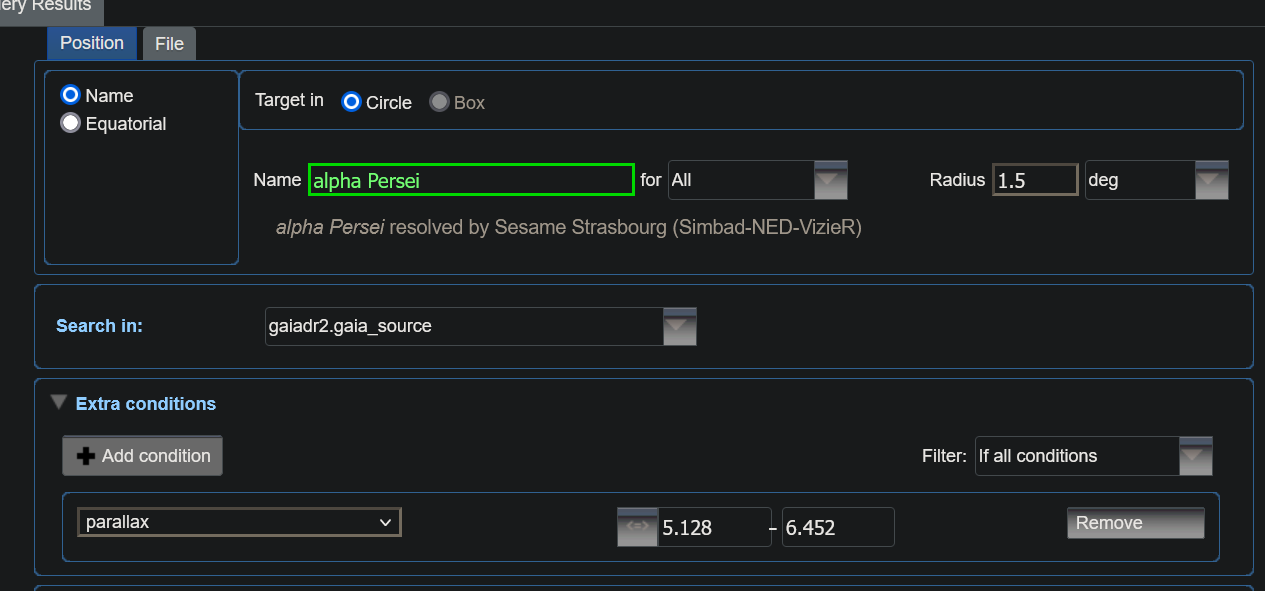
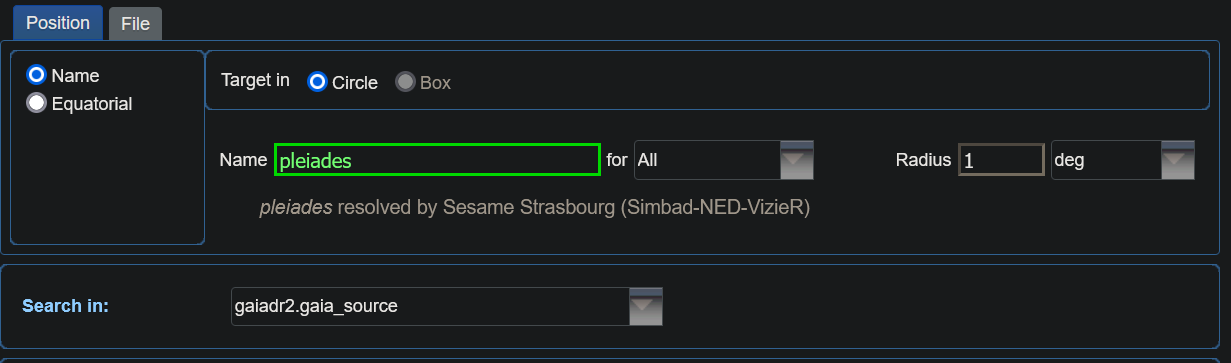
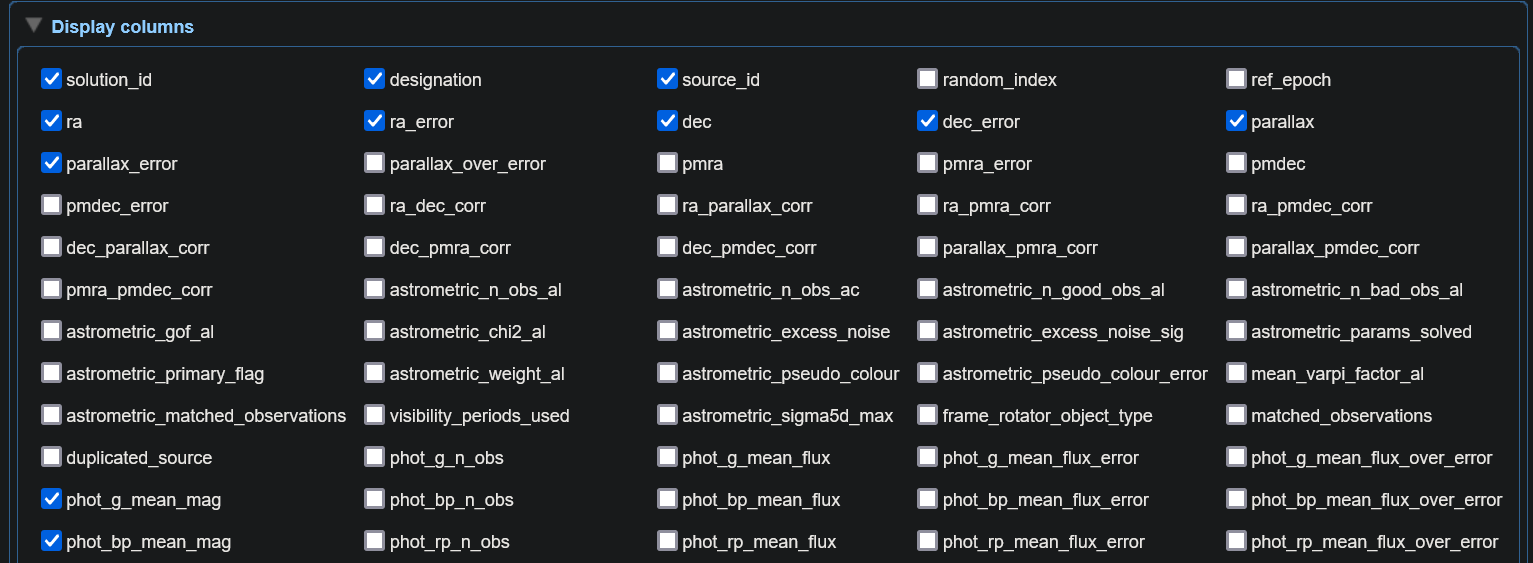
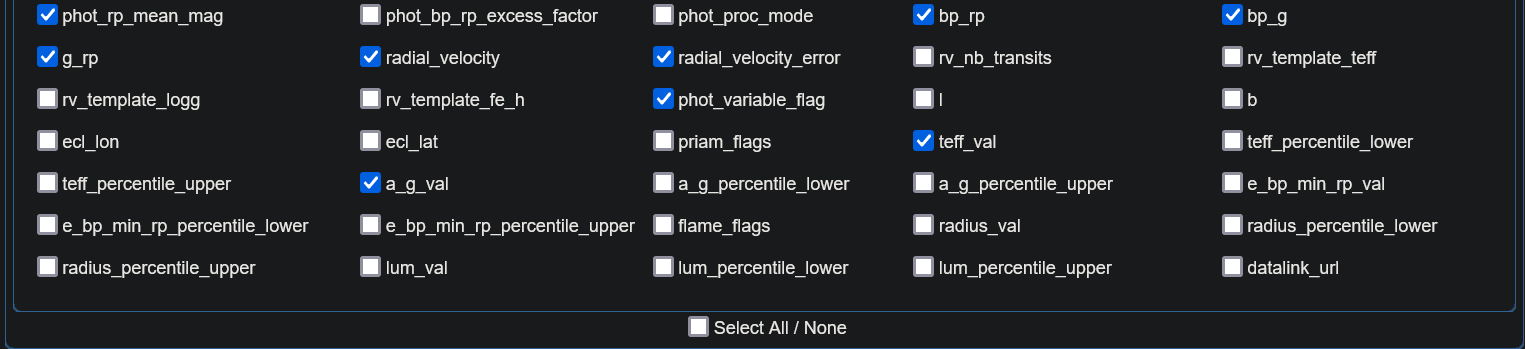

3. Calculate the distance to each star using the parallax. Include a calculation of the error in distance resulting from an error in the parallax. Assume that the effects of interstellar extinction on starlight are negligible. Why is this a good assumption?

Ignoring interstellar extinction is a good assumption because of how close the clusters are. We don't expect there to be a lot of dust to cause extinction between the clusters and Earth.
Using the formula $d[\text{parsec}]=\frac{1}{\omega[\text{arcsec}]}$, we get the following distances:

In [1]:
import glob
import pandas
import numpy as np
import astropy.units as u
from astropy.table import Table
import matplotlib.pyplot as plt
fn_a = 'persei.csv'
data_a = pandas.read_csv(fn_a)
fn_p = 'pleiaded.csv'
data_p = pandas.read_csv(fn_p)
data_a['distance'] = data_a['parallax']**-1*10**3 #units pc
data_p['distance'] = data_p['parallax']**-1*10**3 #units pc
data_a['distance error'] = data_a['distance']*data_a['parallax_error']/data_a['parallax'] #units pc
data_p['distance error'] = data_p['distance']*data_p['parallax_error']/data_p['parallax'] #units pc

4. Calculate the mean, standard deviation, and standard error of the mean of the RA and Dec for each cluster. What is the significance of these numbers?

The significance is that there's not much spread comparatively with small standard deviations. The mean gives us the RA and Dec for each cluster's middle. 

In [2]:
data_persei = {}
data_a['ra hh'] = data_a['ra']/15
data_persei['ra mean'] = data_a['ra hh'].sum()/609*u.deg
data_persei['ra std'] = data_a['ra hh'].std(ddof=0)*u.deg
data_persei['ra standard error'] = data_a['ra hh'].sem(ddof=0)*u.deg
data_persei['dec mean'] = data_a['dec'].sum()/609*u.deg
data_persei['dec std'] = data_a['dec'].std(ddof=0)*u.deg
data_persei['dec standard error'] = data_a['dec'].sem(ddof=0)*u.deg

data_plei = {}
data_p['ra hh'] = data_p['ra']/15
data_plei['ra mean'] = data_p['ra hh'].sum()/586*u.deg
data_plei['ra std'] = data_p['ra hh'].std(ddof=0)*u.deg
data_plei['ra standard error'] = data_p['ra hh'].sem(ddof=0)*u.deg
data_plei['dec mean'] = data_p['dec'].sum()/586*u.deg
data_plei['dec std'] = data_p['dec'].std(ddof=0)*u.deg
data_plei['dec standard error'] = data_p['ra'].sem(ddof=0)*u.deg

5. Make a plot of the distribution of these stars on the sky for each cluster (i.e. Dec as a function of RA) making sure to plot RA in decimal hours. Are your mean RA and Dec calculated in the previous question consistent with the appearance of this diagram?

The data are consistent with our previous measurements!

In [3]:
def ra_conversion(ra):
    deg = ra/15
    hour = (deg).astype(int)
    min = ((deg-hour)*60).astype(int)
    sec = (deg-hour-min/60)*3600
    units = []
    for ii in range(len(ra)):
        unit = f"{hour[ii]}:{min[ii]}:{sec[ii]}"
        units.append(unit)
    return units
def dec_conversion(dec):
    deg = dec.astype(int)
    min = ((dec-deg)*60).astype(int)
    sec = (dec-deg-min/60)*3600
    units = []
    for ii in range(len(dec)):
        unit = f"{deg[ii]}:{min[ii]}:{sec[ii]}"
        units.append(unit)
    return units

In [4]:
persei = Table.from_pandas(data_a)
pleiades = Table.from_pandas(data_p)
persei['parallax'] *= u.mas
pleiades['parallax'] *= u.mas
persei['distance'] *= u.pc
pleiades['distance'] *= u.pc
persei['distance error'] *= u.pc
pleiades['distance error'] *= u.pc
persei['ra hhmmss'] = ra_conversion(persei['ra'])
pleiades['ra hhmmss'] = ra_conversion(pleiades['ra'])
persei['dec ddmmss'] = dec_conversion(persei['dec'])
pleiades['dec ddmmss'] = dec_conversion(pleiades['dec'])
persei['ra dec hour'] = persei['ra']/15 *u.hr
pleiades['ra dec hour'] = pleiades['ra']/15 *u.hr
persei['ra'] *= u.deg
pleiades['ra'] *= u.deg
persei['dec'] *= u.deg
pleiades['dec'] *= u.deg
persei['G flux'] = persei['phot_g_mean_flux']
persei['G flux error'] = persei['phot_g_mean_flux_error']
persei['G mag'] = persei['phot_g_mean_mag']
persei['G_BP mag'] = persei['phot_bp_mean_mag']
persei['G_RP mag'] = persei['phot_rp_mean_mag']
pleiades['G flux'] = pleiades['phot_g_mean_flux']
pleiades['G flux error'] = pleiades['phot_g_mean_flux_error']
pleiades['G mag'] = pleiades['phot_g_mean_mag']
pleiades['G_BP mag'] = pleiades['phot_bp_mean_mag']
pleiades['G_RP mag'] = pleiades['phot_rp_mean_mag']

Text(0.5, 1.0, 'Pleiades')

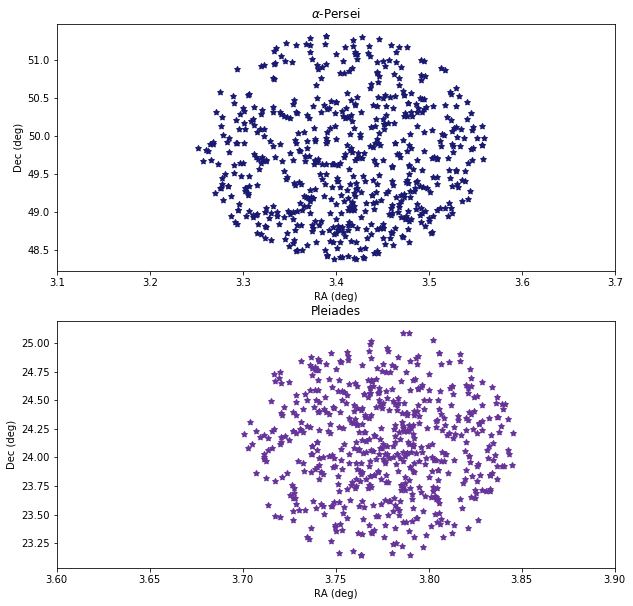

In [5]:
x1 = persei['ra dec hour']
x2 = pleiades['ra dec hour']
y1 = persei['dec'] 
y2 = pleiades['dec']

plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,1,1)
ax1.scatter(x1, y1, marker=(5, 1), color='midnightblue', label= r'$\alpha$ Persei')
plt.xlim((3.1,3.7))
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.title(r'$\alpha$-Persei')
ax2 = plt.subplot(2,1,2)
ax2.scatter(x2, y2, marker=(5, 1), color='rebeccapurple', label='Pleiades')
plt.xlim((3.6,3.9))
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.title('Pleiades')

In [6]:
persei

source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_mag,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_mag,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,phot_variable_flag,teff_val,a_g_val,distance,distance error,ra hh,ra hhmmss,dec ddmmss,ra dec hour,G flux,G flux error,G mag,G_BP mag,G_RP mag
,deg,,deg,,mas,,,,,,,,,,,,,,,,,,,pc,pc,,,,h,,,,,
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str13,float64,float64,float64,float64,float64,str24,str25,float64,float64,float64,float64,float64,float64
249236647249997696,52.07799816050952,0.02735369764637676,48.66327520982392,0.02070214588591836,5.739072320659509,0.035206364980562475,178615.0444944814,176.43966067785394,12.558571,77804.19422945254,298.89680463554373,13.123879999999998,144082.7546744486,349.10597370359017,11.86539,1.2584906,0.5653095,0.69318104,0.6445710380329537,0.8655973926909697,NOT_AVAILABLE,4949.115,0.204,174.2441886296154,1.068901759358081,3.471866544033968,3:28:18.71955852228475,48:39:47.79075536612019,3.471866544033968,178615.0444944814,176.43966067785394,12.558571,13.123879999999998,11.86539
249241663772002048,52.43759668597534,0.17075487973298425,48.815603834388504,0.10517801391418984,5.522497832266666,0.19249621961447894,929.0549211354836,1.90208909983367,18.268263,97.74328526465416,6.227580315246871,20.376171,1431.280850992394,7.155338379084193,16.872608,3.5035629999999998,2.1079082000000002,1.3956547,--,--,NOT_AVAILABLE,--,--,181.07748167092677,6.311769010628444,3.495839779065023,3:29:45.02320463408227,48:48:56.173803798615566,3.495839779065023,929.0549211354836,1.90208909983367,18.268263,20.376171,16.872608
249232730234227072,52.17350764066001,0.2722741852362097,48.59716313063736,0.20503931404389436,5.318718793501758,0.3423091578100151,417.6767197372977,1.1740083137728186,19.136264999999998,37.64514372043868,5.8480155486038745,21.412115,657.6377803451478,6.524190855310186,17.716953,3.6951617999999993,2.2758502999999997,1.4193115,--,--,NOT_AVAILABLE,--,--,188.01520419198854,12.100531857610106,3.4782338427106674,3:28:41.641833758402534,48:35:49.7872702945044,3.4782338427106674,417.6767197372977,1.1740083137728186,19.136264999999998,21.412115,17.716953
249245683861151488,52.37905423171989,0.019269651493407418,48.870867514648246,0.01542349593513753,6.408510207191081,0.025399734013115287,41219.43908214624,9.52684509380109,14.150610999999998,11745.516967836316,23.4793557986474,15.176707999999998,43758.38273870542,60.03782794998968,13.159266,2.0174417,1.0260973,0.99134445,--,--,NOT_AVAILABLE,4207.27,0.6837,156.04250717707927,0.6184648301862757,3.491936948781326,3:29:30.973015612773146,48:52:15.12305273368657,3.491936948781326,41219.43908214624,9.52684509380109,14.150610999999998,15.176707999999998,13.159266
249346525393154048,52.833151420937774,0.13967280197760648,49.121681405695035,0.10794170200879978,5.4364729396008835,0.1890766443804846,1072.7265305227018,1.8249391462478437,18.112143,231.16490754733985,11.907680003090944,19.441584,1374.0050795910092,10.556037083286032,16.916948,2.5246353,1.3294411,1.1951942,--,--,NOT_AVAILABLE,--,--,183.94278995039284,6.3973988040043315,3.522210094729185,3:31:19.95634102506503,49:7:18.05306050212777,3.522210094729185,1072.7265305227018,1.8249391462478437,18.112143,19.441584,16.916948
249343845333181952,52.855228040080696,0.1918491032442363,49.04740126719649,0.1324862945810391,6.191390525620693,0.27572613560210474,972.7828568828903,2.5848314939466177,18.218327,104.84899809365689,9.940936508792786,20.299978,1487.7943161833982,8.783091008694063,16.830563,3.4694157,2.0816517,1.387764,--,--,NOT_AVAILABLE,--,--,161.51460578393238,7.192858843552996,3.5236818693387133,3:31:25.2547296193677,49:2:50.64456190736905,3.5236818693387133,972.7828568828903,2.5848314939466177,18.218327,20.299978

In [7]:
pleiades

source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_mag,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_mag,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,phot_variable_flag,teff_val,a_g_val,distance,distance error,ra hh,ra hhmmss,dec ddmmss,ra dec hour,G flux,G flux error,G mag,G_BP mag,G_RP mag
,deg,,deg,,mas,,,,,,,,,,,,,,,,,,,pc,pc,,,,h,,,,,
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str13,float64,float64,float64,float64,float64,str24,str25,float64,float64,float64,float64,float64,float64
69807963184755840,56.25481621280633,0.09120013019335783,24.77791432889511,0.054274271311222366,7.417320599391199,0.09660676038900932,4471.616972366853,5.864164738321693,16.562204,715.4754078747145,10.261976627848265,18.214901,6226.626523016941,15.380104008619783,15.276288000000001,2.938613,1.6526966,1.2859163,--,--,NOT_AVAILABLE,4648.69,0.4335,134.81957353738738,1.7559551406668106,3.7503210808537557,3:45:1.155891073520543,24:46:40.49158402239992,3.7503210808537557,4471.616972366853,5.864164738321693,16.562204,18.214901,15.276288000000001
69824249700740736,56.10293821837722,0.18508727093497232,24.864663544100104,0.1085578649997712,7.013173551302468,0.17580425648579784,7905.173120076068,7.935595297492322,15.943586999999999,1209.1479545414113,14.355197316081927,17.64519,10956.661225783315,23.62891270905186,14.6627245,2.9824648,1.701602,1.2808628,--,--,NOT_AVAILABLE,4462.17,--,142.58879987566866,3.574375817448385,3.740195881225148,3:44:24.705172410532626,24:51:52.78875876037383,3.740195881225148,7905.173120076068,7.935595297492322,15.943586999999999,17.64519,14.6627245
69817201658236288,56.51401197526275,0.6374433061404041,24.92790210175593,0.4419348411334744,8.65996783866331,0.6989329047005991,919.9474148436772,7.318776939474376,18.278957000000002,412.7776158673977,7.472692109602439,18.812098000000002,1041.4677761601863,14.638461861381275,17.217806,1.5942916999999999,0.5331402,1.0611515,--,--,NOT_AVAILABLE,--,--,115.47386995311899,9.31972137159926,3.7676007983508497,3:46:3.362874063058774,24:55:40.44756632134621,3.7676007983508497,919.9474148436772,7.318776939474376,18.278957000000002,18.812098000000002,17.217806
69811364798863744,56.10348263799232,0.050044425453401584,24.76821918626869,0.026497236855411586,7.470613704718746,0.05306481310822338,30702.74356199109,65.209319946544,14.470423,7780.98168390203,80.38287526333761,15.623802,35117.84279833408,188.25705615712482,13.398101,2.2257013,1.1533794,1.0723219,--,--,NOT_AVAILABLE,3533.25,0.691,133.8578113560281,0.9508107397116273,3.7402321758661548,3:44:24.83583311815729,24:46:5.5890705672886565,3.7402321758661548,30702.74356199109,65.209319946544,14.470423,15.623802,13.398101
69806039039416832,56.27740405421808,0.15707511029982027,24.67841523756801,0.08753670276489757,7.554070400251452,0.1688967296343097,1628.0660337721474,3.7396434535704217,17.659185,243.9726157449448,15.428901079247424,19.383035999999997,2485.991750919101,22.04070706447129,16.27317,3.1098652,1.7238503,1.3860149,--,--,NOT_AVAILABLE,--,--,132.37896220383558,2.959778318701859,3.751826936947872,3:45:6.5769730123394154,24:40:42.29485524483905,3.751826936947872,1628.0660337721474,3.7396434535704217,17.659185,19.383035999999997,16.27317
69811639676769536,56.08380189550965,0.04980770585465752,24.795967541491933,0.026489921505264132,7.424900457522267,0.051266107993134906,1225777.41489081,1922.879479732504,10.467336999999999,638884.8722589965,3524.6083087428747,10.8378315,833249.9834306388,3532.6774700240626,9.959982,0.8778495999999999,0.37049484,0.50735474,3.8939714465888073,3.0986250586978388,NOT_AVAILABLE,5430.6875,0.1275,134.68194027933217,0.9299274696794119,3.73892012636731,3:44:20.11245492231688,24:47:45.48314937095941,3.73892012636731,1225777.41489081,1922.879479732504,10.467336

6. Compute the mean distance, its standard deviation, and standard error of the mean for the stars from question 2 for each cluster. Make histograms showing the number of stars as a function of distance for each cluster. Use this histogram to make catalogs that better isolate stars in each cluster. Clearly describe how you selected the isolated stars, giving quantitative values for the distance range of the retained stars. Remake your plots from question 5 and recalculate the values in question 4.

In [8]:
data_persei['mean distance'] = data_a['distance'].sum()/609*u.pc
data_persei['distance std'] = data_a['distance'].std(ddof=0)*u.pc
data_persei['distance standard error'] = data_a['distance'].sem(ddof=0)*u.pc

data_plei['mean distance'] = data_p['distance'].sum()/586*u.pc
data_plei['distance std'] = data_p['distance'].std(ddof=0)*u.pc
data_plei['distance standard error'] = data_p['distance'].sem(ddof=0)*u.pc

In [9]:
data_persei

{'ra mean': <Quantity 3.41264848 deg>,
 'ra std': <Quantity 0.07250367 deg>,
 'ra standard error': <Quantity 0.002938 deg>,
 'dec mean': <Quantity 49.69515338 deg>,
 'dec std': <Quantity 0.73693488 deg>,
 'dec standard error': <Quantity 0.02986211 deg>,
 'mean distance': <Quantity 175.51373459 pc>,
 'distance std': <Quantity 9.33263291 pc>,
 'distance standard error': <Quantity 0.37817737 pc>}

In [10]:
data_plei

{'ra mean': <Quantity 3.77585725 deg>,
 'ra std': <Quantity 0.03299562 deg>,
 'ra standard error': <Quantity 0.00136304 deg>,
 'dec mean': <Quantity 24.11512612 deg>,
 'dec std': <Quantity 0.43397527 deg>,
 'dec standard error': <Quantity 0.02044555 deg>,
 'mean distance': <Quantity 136.39979233 pc>,
 'distance std': <Quantity 6.46649779 pc>,
 'distance standard error': <Quantity 0.26712856 pc>}

Text(0.5, 1.0, 'Distribution of Distances in $\\alpha$-Persei')

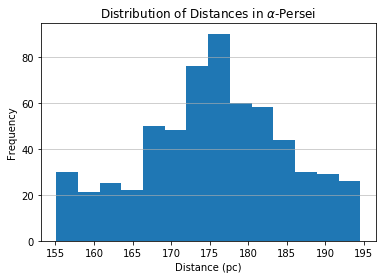

In [11]:
x1 = persei['distance']
x2 = pleiades['distance']
n, bins, patches = plt.hist(x=x1, bins='auto')#, color='#0504aa')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Distance (pc)')
plt.ylabel('Frequency')
plt.title(r'Distribution of Distances in $\alpha$-Persei')

Text(0.5, 1.0, 'Distribution of Distances in Pleiades')

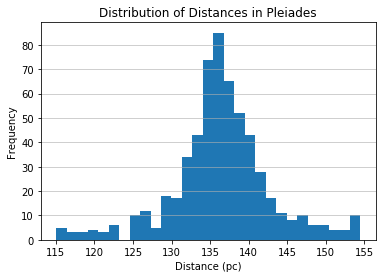

In [12]:
n, bins, patches = plt.hist(x=x2, bins='auto')#, color='#0504aa')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Distance (pc)')
plt.ylabel('Frequency')
plt.title('Distribution of Distances in Pleiades')

In [13]:
#selected stars
ii_a = []
for ii,dis in enumerate(persei['distance']):
    if 160<= dis <= 190:
        ii_a.append(ii)
selected_a = data_a.iloc[ii_a,:]
len_a = len(selected_a['dec'])
ii_p = []
for ii,dis in enumerate(pleiades['distance']):
    if 130<= dis <= 145:
        ii_p.append(ii)
selected_p = data_p.iloc[ii_p,:]
len_p = len(selected_p['dec'])


data_persei['ra mean'] = selected_a['ra hh'].sum()/len_a*u.deg
data_persei['ra std'] = selected_a['ra hh'].std(ddof=0)*u.deg
data_persei['ra standard error'] = selected_a['ra hh'].sem(ddof=0)*u.deg
data_persei['dec mean'] = selected_a['dec'].sum()/len_a*u.deg
data_persei['dec mean'] = selected_a['dec'].sum()/len_a*u.deg
data_persei['dec std'] = selected_a['dec'].std(ddof=0)*u.deg
data_persei['dec standard error'] = selected_a['dec'].sem(ddof=0)*u.deg

data_plei['ra mean'] = selected_p['ra hh'].sum()/len_p*u.deg
data_plei['ra std'] = selected_p['ra hh'].std(ddof=0)*u.deg
data_plei['ra standard error'] = selected_p['ra hh'].sem(ddof=0)*u.deg
data_plei['dec mean'] = selected_p['dec'].sum()/len_p*u.deg
data_plei['dec std'] = selected_p['dec'].std(ddof=0)*u.deg
data_plei['dec standard error'] = selected_p['ra'].sem(ddof=0)*u.deg

In [14]:
s_persei = Table.from_pandas(selected_a)
s_pleiades = Table.from_pandas(selected_p)
s_persei['parallax'] *= u.mas
s_pleiades['parallax'] *= u.mas
s_persei['distance'] *= u.pc
s_pleiades['distance'] *= u.pc
s_persei['distance error'] *= u.pc
s_pleiades['distance error'] *= u.pc
s_persei['ra hhmmss'] = ra_conversion(s_persei['ra'])
s_pleiades['ra hhmmss'] = ra_conversion(s_pleiades['ra'])
s_persei['dec ddmmss'] = dec_conversion(s_persei['dec'])
s_pleiades['dec ddmmss'] = dec_conversion(s_pleiades['dec'])
s_persei['ra dec hour'] = s_persei['ra']/15 *u.hr
s_pleiades['ra dec hour'] = s_pleiades['ra']/15 *u.hr
s_persei['ra'] *= u.deg
s_pleiades['ra'] *= u.deg
s_persei['dec'] *= u.deg
s_pleiades['dec'] *= u.deg
s_persei['G flux'] = s_persei['phot_g_mean_flux']
s_persei['G flux error'] = s_persei['phot_g_mean_flux_error']
s_persei['G mag'] = s_persei['phot_g_mean_mag']
s_persei['G_BP mag'] = s_persei['phot_bp_mean_mag']
s_persei['G_RP mag'] = s_persei['phot_rp_mean_mag']
s_pleiades['G flux'] = s_pleiades['phot_g_mean_flux']
s_pleiades['G flux error'] = s_pleiades['phot_g_mean_flux_error']
s_pleiades['G mag'] = s_pleiades['phot_g_mean_mag']
s_pleiades['G_BP mag'] = s_pleiades['phot_bp_mean_mag']
s_pleiades['G_RP mag'] = s_pleiades['phot_rp_mean_mag']

In [15]:
data_persei

{'ra mean': <Quantity 3.41380705 deg>,
 'ra std': <Quantity 0.07288784 deg>,
 'ra standard error': <Quantity 0.00318716 deg>,
 'dec mean': <Quantity 49.69418577 deg>,
 'dec std': <Quantity 0.73623496 deg>,
 'dec standard error': <Quantity 0.03219331 deg>,
 'mean distance': <Quantity 175.51373459 pc>,
 'distance std': <Quantity 9.33263291 pc>,
 'distance standard error': <Quantity 0.37817737 pc>}

In [16]:
data_plei

{'ra mean': <Quantity 3.77525348 deg>,
 'ra std': <Quantity 0.03246137 deg>,
 'ra standard error': <Quantity 0.00149733 deg>,
 'dec mean': <Quantity 24.1071086 deg>,
 'dec std': <Quantity 0.43382536 deg>,
 'dec standard error': <Quantity 0.02245997 deg>,
 'mean distance': <Quantity 136.39979233 pc>,
 'distance std': <Quantity 6.46649779 pc>,
 'distance standard error': <Quantity 0.26712856 pc>}

Text(0.5, 1.0, 'Pleiades')

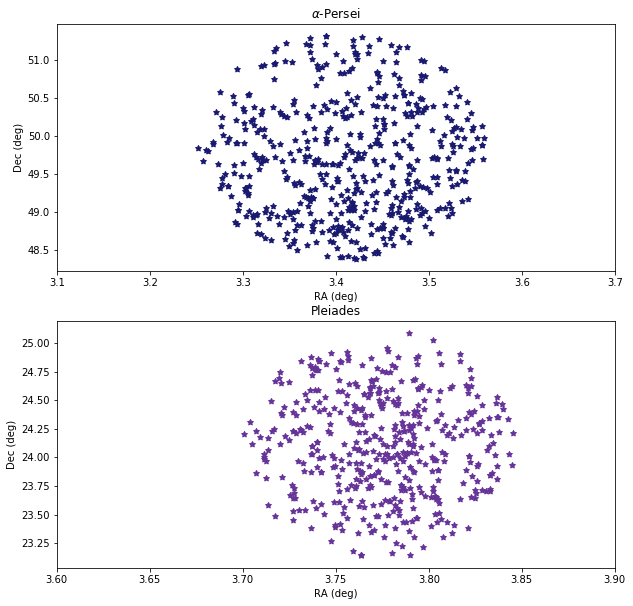

In [17]:
x1 = s_persei['ra dec hour']
x2 = s_pleiades['ra dec hour']
y1 = s_persei['dec'] 
y2 = s_pleiades['dec']

plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,1,1)
ax1.scatter(x1, y1, marker=(5, 1), color='midnightblue', label= r'$\alpha$ Persei')
plt.xlim((3.1,3.7))
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.title(r'$\alpha$-Persei')
ax2 = plt.subplot(2,1,2)
ax2.scatter(x2, y2, marker=(5, 1), color='rebeccapurple', label='Pleiades')
plt.xlim((3.6,3.9))
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.title('Pleiades')

7. Make plots of the $G$ errors as a function of the $G$ magnitude. Describe the behavior of this diagram and discuss the reasons for its appearance.

The error increases as the magnitude increases, likely due to the difficulties in accurately detecting fainter stars. Gaia was only supposed to measure objects down to magnitude 20, so it is not surprising that the error picks up exponentially around 20.

Text(0.5, 1.0, 'Pleiades')

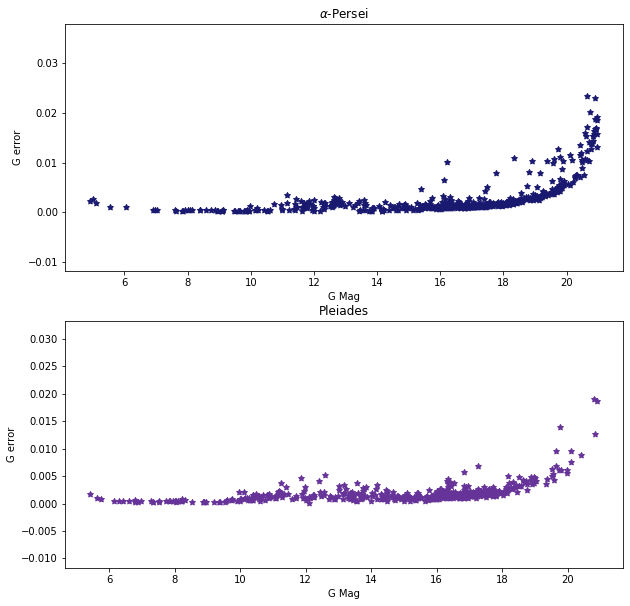

In [18]:
s_persei['G error'] = 2.5/2.3*s_persei['G flux error']/s_persei['G flux'] #2.3 is ln(10)
y1 = s_persei['G error']
s_pleiades['G error'] = 2.5/2.3*s_pleiades['G flux error']/s_pleiades['G flux']
y2 = s_pleiades['G error']
x1 = s_persei['G mag']
x2 = s_pleiades['G mag'] 

plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,1,1)
ax1.scatter(x1, y1, marker=(5, 1), color='midnightblue', label= r'$\alpha$ Persei')
plt.xlabel('G Mag')
plt.ylabel('G error')
plt.title(r'$\alpha$-Persei')
ax2 = plt.subplot(2,1,2)
ax2.scatter(x2, y2, marker=(5, 1), color='rebeccapurple', label='Pleiades')
plt.xlabel('G Mag')
plt.ylabel('G error')
plt.title('Pleiades')

8. Now plot the apparent $G$, $G_{BP}–G_{RP}$ color-magnitude diagram (CMD) for each cluster including the $G$ error bars. What are the principal sequences apparent in this diagram? If stars deviate from these sequences, what do you think is the main reason?

The principal sequence appears to be main sequence stars while the other stars appear to be older stars that have evolved off the main sequence.

C:\Users\mjfer\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Pleiades CMD')

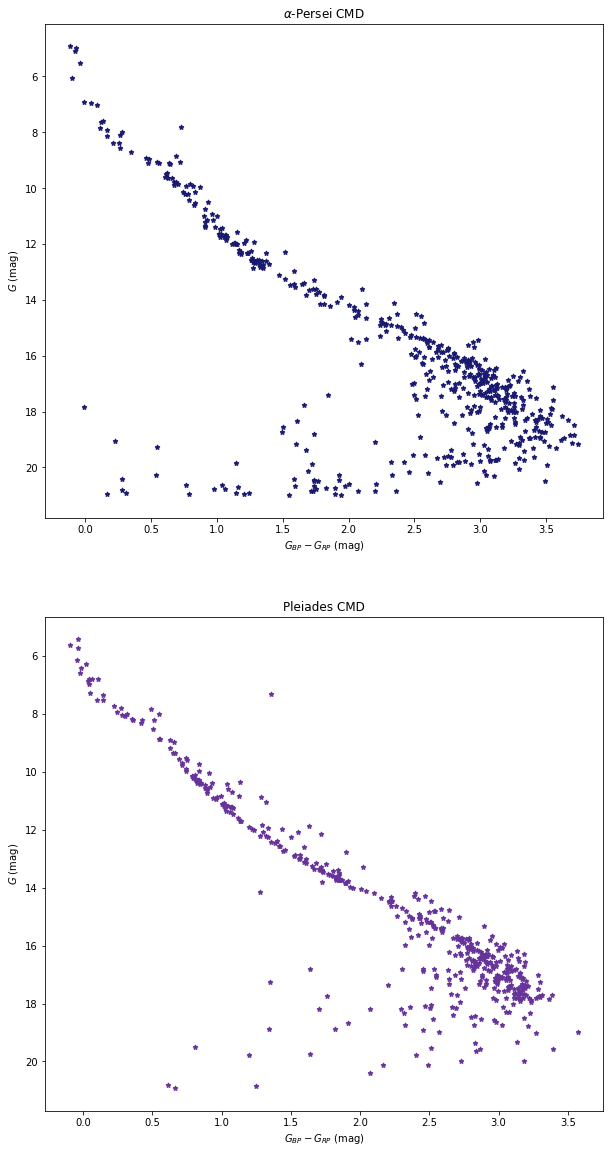

In [19]:
y1 = s_persei['G mag']
y2 = s_pleiades['G mag']
yerr1 = s_persei['G error']
yerr2 = s_pleiades['G error']
x1 = s_persei['G_BP mag'] -  s_persei['G_RP mag']
x2 = s_pleiades['G_BP mag'] - s_pleiades['G_RP mag']

plt.figure(figsize=(10,20))
ax1 = plt.subplot(2,1,1)
#the error bars are there but you really have to zoom in to see them
plt.errorbar(x1, y1, yerr=yerr1, marker=(5, 1), color='midnightblue', linestyle='',
             markersize=5, label= r'$\alpha$ Persei')
plt.gca().invert_yaxis()
plt.xlabel(r'$G_{BP}-G_{RP}$ (mag)')
plt.ylabel(r'$G$ (mag)')
plt.title(r'$\alpha$-Persei CMD')
ax2 = plt.subplot(2,1,2)
plt.errorbar(x2, y2, yerr=yerr2, marker=(5, 1), color='rebeccapurple', linestyle='',
             markersize=5, label='Pleiades')
plt.gca().invert_yaxis()
plt.xlabel(r'$G_{BP}-G_{RP}$ (mag)')
plt.ylabel(r'$G$ (mag)')
plt.title('Pleiades CMD')

9. Adopt twice the standard deviation in the distances ($2\sigma$) as the line-of-sight size of each cluster. Differentiate the equation of photometric parallax ($m-M=-5+5\log(d)$) with respect to the distance. Plot $\Delta m$ as a function of distance assuming $\Delta d$ represents the $2\sigma$ line-of-sight size of each cluster. At the mean distance of each cluster, what does this plot predict for the expected magnitude spread seen in the CMDs plotted in 8? Is this value qualitatively consistent with that displayed in the CMD?

We have $\dfrac{\Delta}{\Delta d}[m-M=-5+5\log(d)]=\dfrac{\Delta m}{\Delta d}=\dfrac{1}{\ln(10)}\dfrac5d\to \Delta m=\dfrac{2\sigma}{\ln(10)}\dfrac5d$. The graph suggests a much smaller change in apparent magnitudes than seen in the CMD. This means very little, however, given that our derivative got rid of the distance-independent absolute magnitude which we have no reason to assume is constant for each star.

Text(0.5, 1.0, 'Pleiades')

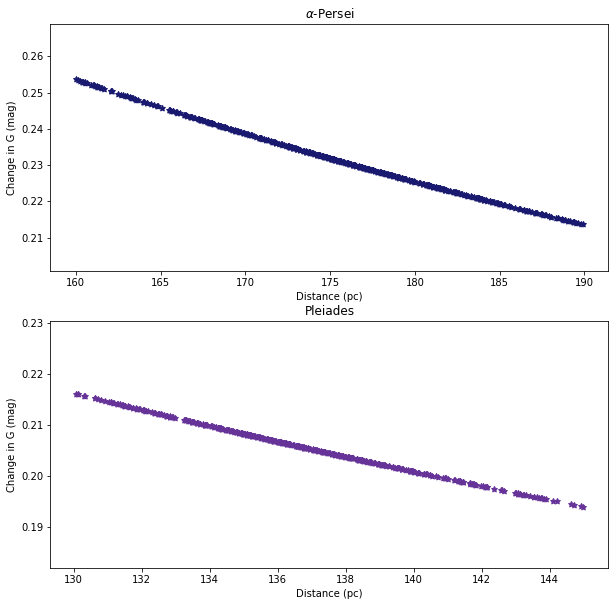

In [20]:
y1 = 10*data_persei['distance std']/2.3/s_persei['distance']
y2 = 10*data_plei['distance std']/2.3/s_pleiades['distance']
x1 = s_persei['distance']
x2 = s_pleiades['distance'] 

plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,1,1)
ax1.scatter(x1, y1, marker=(5, 1), color='midnightblue', label= r'$\alpha$ Persei')
plt.xlabel('Distance (pc)')
plt.ylabel('Change in G (mag)')
plt.title(r'$\alpha$-Persei')
ax2 = plt.subplot(2,1,2)
ax2.scatter(x2, y2, marker=(5, 1), color='rebeccapurple', label='Pleiades')
plt.xlabel('Distance (pc)')
plt.ylabel('Change in G (mag)')
plt.title('Pleiades')

10. Use the distances you have determined to calculate the absolute $G$ magnitude of each star. Remember to propagate the errors in distance and the apparent $G$ magnitude to get the resultant error in $M_G$.

The absolute magnitude is calculated by $M=m-5\log(d)+5$, so

In [21]:
s_persei['Absolute G'] = s_persei['G mag'] - 5*np.log(s_persei['distance'])/np.log(10)+5
s_pleiades['Absolute G'] = s_pleiades['G mag'] - 5*np.log(s_pleiades['distance'])/np.log(10)+5
s_persei['Absolute G error'] = ((s_persei['G error'])**2 - (5*s_persei['distance error']/np.log(10)/s_persei['distance'])**2)**0.5
s_pleiades['Absolute G error'] = ((s_pleiades['G error'])**2 - (5*s_pleiades['distance error']/np.log(10)/s_pleiades['distance'])**2)**0.5

C:\Users\mjfer\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mjfer\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


11. Compute (a) the distance modulus corresponding to the mean distance to the cluster, and (b) the mean of the distance moduli for the individual stars.

(a) The distance modulus $m-M$ is calculated using the distance with $5\log(d)-5$. So, the distance modulus is then $5\log(175.51373459)-5=6.22$ for $\alpha$-Persei and $5\log(136.39979233)-5=5.67$ for Pleiades.

(b)

In [22]:
s_persei['distance mod'] = s_persei['G mag'] - s_persei['Absolute G']
s_pleiades['distance mod'] = s_pleiades['G mag'] - s_pleiades['Absolute G']
data_persei['distance mod'] = s_persei['distance mod'].sum()/len_a
data_plei['distance mod'] = s_pleiades['distance mod'].sum()/len_p

In [23]:
data_persei

{'ra mean': <Quantity 3.41380705 deg>,
 'ra std': <Quantity 0.07288784 deg>,
 'ra standard error': <Quantity 0.00318716 deg>,
 'dec mean': <Quantity 49.69418577 deg>,
 'dec std': <Quantity 0.73623496 deg>,
 'dec standard error': <Quantity 0.03219331 deg>,
 'mean distance': <Quantity 175.51373459 pc>,
 'distance std': <Quantity 9.33263291 pc>,
 'distance standard error': <Quantity 0.37817737 pc>,
 'distance mod': 6.220501364399861}

In [24]:
data_plei

{'ra mean': <Quantity 3.77525348 deg>,
 'ra std': <Quantity 0.03246137 deg>,
 'ra standard error': <Quantity 0.00149733 deg>,
 'dec mean': <Quantity 24.1071086 deg>,
 'dec std': <Quantity 0.43382536 deg>,
 'dec standard error': <Quantity 0.02245997 deg>,
 'mean distance': <Quantity 136.39979233 pc>,
 'distance std': <Quantity 6.46649779 pc>,
 'distance standard error': <Quantity 0.26712856 pc>,
 'distance mod': 5.679873353845695}

12. Plot the H-R Diagram with ($G_{BP}–G_{RP}$) on the x-axis and $M_G$ on the y-axis. Include the error bars in $M_G$. How has the appearance of this diagram changed compared with the CMD constructed in question 10?

Text(0.5, 1.0, 'Pleiades H-R')

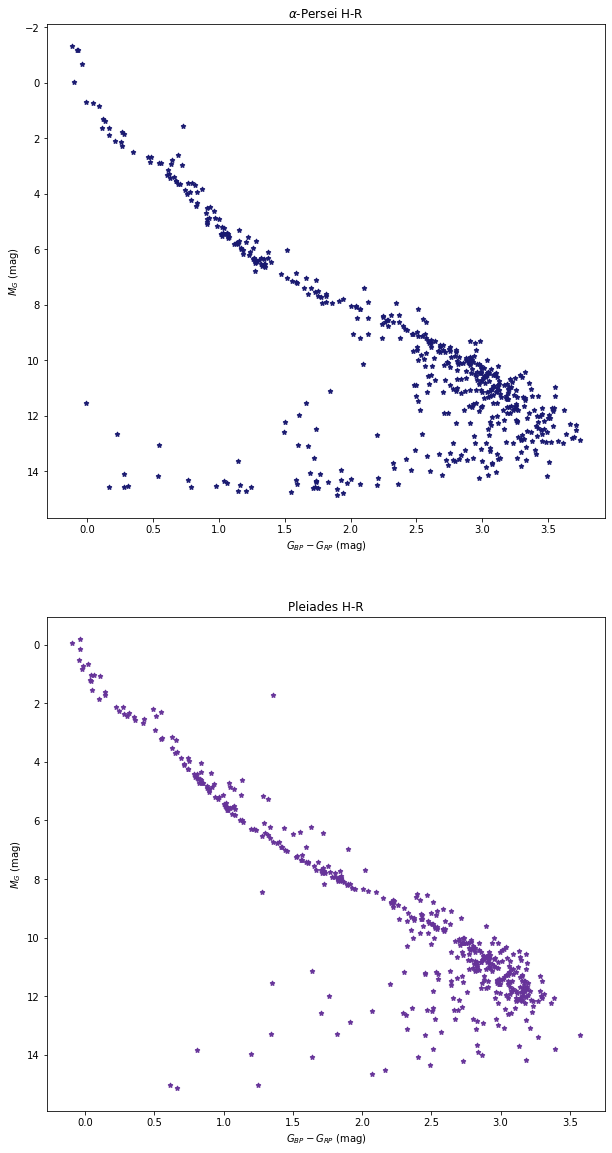

In [25]:
y1 = s_persei['Absolute G']
y2 = s_pleiades['Absolute G']
yerr1 = s_persei['Absolute G error']
yerr2 = s_pleiades['Absolute G error']
x1 = s_persei['G_BP mag'] -  s_persei['G_RP mag']
x2 = s_pleiades['G_BP mag'] - s_pleiades['G_RP mag']

plt.figure(figsize=(10,20))
ax1 = plt.subplot(2,1,1)
#the error bars are there but you really have to zoom in to see them
plt.errorbar(x1, y1, yerr=yerr1, marker=(5, 1), color='midnightblue', linestyle='',
             markersize=5, label= r'$\alpha$ Persei')
plt.gca().invert_yaxis()
plt.xlabel(r'$G_{BP}-G_{RP}$ (mag)')
plt.ylabel(r'$M_{G}$ (mag)')
plt.title(r'$\alpha$-Persei H-R')
ax2 = plt.subplot(2,1,2)
plt.errorbar(x2, y2, yerr=yerr2, marker=(5, 1), color='rebeccapurple', linestyle='',
             markersize=5, label='Pleiades')
plt.gca().invert_yaxis()
plt.xlabel(r'$G_{BP}-G_{RP}$ (mag)')
plt.ylabel(r'$M_{G}$ (mag)')
plt.title('Pleiades H-R')

13. Download theoretical isochrones for Z=0.019 and Z=0.03 solar. Clearly describe the assumptions associated with these isochrones. Overplot the isochrones for each metallicity and for a range of ages on the H-R diagrams. Comment on which metallicity isochrones provide the best fits to the unevolved main sequence. Note that http://stev.oapd.inaf.it/cgi-bin/cmd is a useful resource for obtaining isochrones, but be sure you look at the readme file and understand what you are plotting.

They look identical so I'm not sure.


In [26]:
def isochrone(file):
    files = glob.glob(file)
    data_raw = [np.loadtxt(name, unpack=True) for name in files]
    x_in = [iso[-2] - iso[-1] for iso in data_raw]
    y_in = [iso[-3] for iso in data_raw]
    xs = []
    ys = []
    for ii,x in enumerate(x_in):
        y = y_in[ii]
        mask11 = x < -1
        x1 = x[~mask11]
        y1 = y[~mask11]
        mask12 = x1 > 5
        x2 = x1[~mask12]
        y2 = y1[~mask12]
        mask21 = y2 < -7
        x3 = x2[~mask21]
        y3 = y2[~mask21]
        mask22 = y3 > 17
        x4 = x3[~mask22]
        y4 = y3[~mask22]
        xs.append(x4)
        ys.append(y4)
    return xs,ys

In [27]:
x03, y03 = isochrone('iso03*dat')
x19, y19 = isochrone('iso19*dat')
lables = ['7 dex', '7.5 dex', '8 dex', '8.5 dex', '9 dex', '9.5 dex', '10 dex']
y1 = s_persei['Absolute G']
y2 = s_pleiades['Absolute G']
yerr1 = s_persei['Absolute G error']
yerr2 = s_pleiades['Absolute G error']
x1 = s_persei['G_BP mag'] -  s_persei['G_RP mag']
x2 = s_pleiades['G_BP mag'] - s_pleiades['G_RP mag']

Text(0.5, 1.0, '$\\alpha$-Persei H-R, Z=0.019')

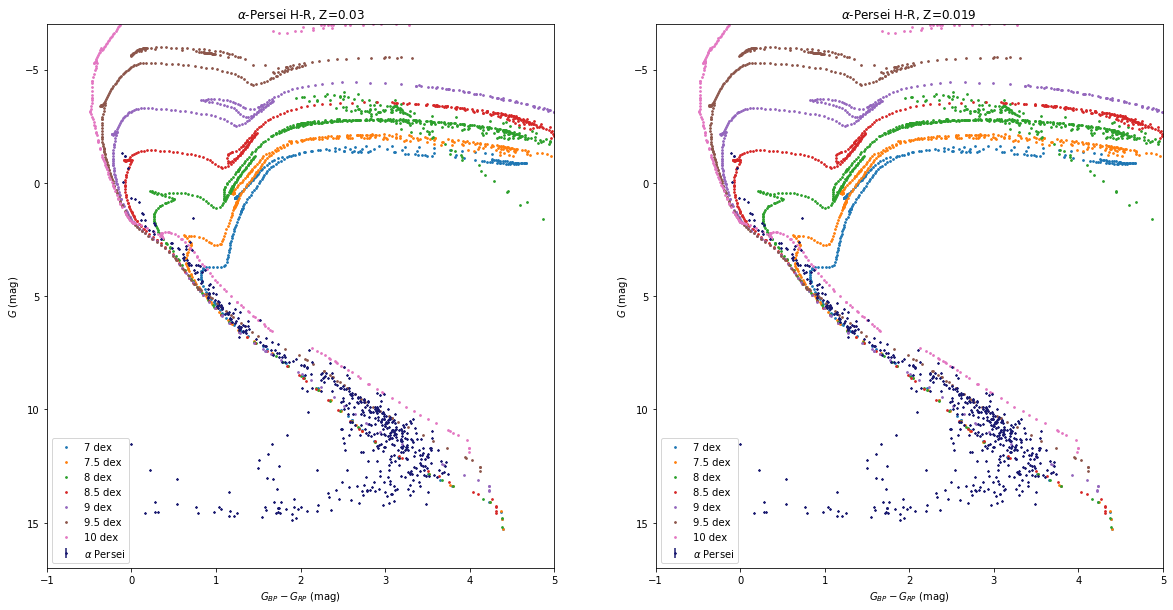

In [28]:
plt.figure(figsize=(20,10))
ax1 = plt.subplot(1,2,1)
#the error bars are there but you really have to zoom in to see them
plt.errorbar(x1, y1, yerr=yerr1, marker=(5, 1), color='midnightblue', linestyle='',
             markersize=2, label= r'$\alpha$ Persei')
for ii in range(len(x03)):
    plt.scatter(x03[ii], y03[ii], s=3, label=lables[ii])
plt.xlim((-1,5))
plt.ylim((-7,17))
plt.legend()
plt.gca().invert_yaxis()

plt.xlabel(r'$G_{BP}-G_{RP}$ (mag)')
plt.ylabel(r'$G$ (mag)')
plt.title(r'$\alpha$-Persei H-R, Z=0.03')
ax2 = plt.subplot(1,2,2)
plt.errorbar(x1, y1, yerr=yerr1, marker=(5, 1), color='midnightblue', linestyle='',
             markersize=2, label= r'$\alpha$ Persei')
for ii in range(len(x19)):
    plt.scatter(x19[ii], y19[ii], s=3, label=lables[ii])
plt.xlim((-1,5))
plt.ylim((-7,17))
plt.legend()
plt.gca().invert_yaxis()
plt.xlabel(r'$G_{BP}-G_{RP}$ (mag)')
plt.ylabel(r'$G$ (mag)')
plt.title(r'$\alpha$-Persei H-R, Z=0.019')

Text(0.5, 1.0, 'Pleiades and $\\alpha$-Persei H-R, Z=0.019')

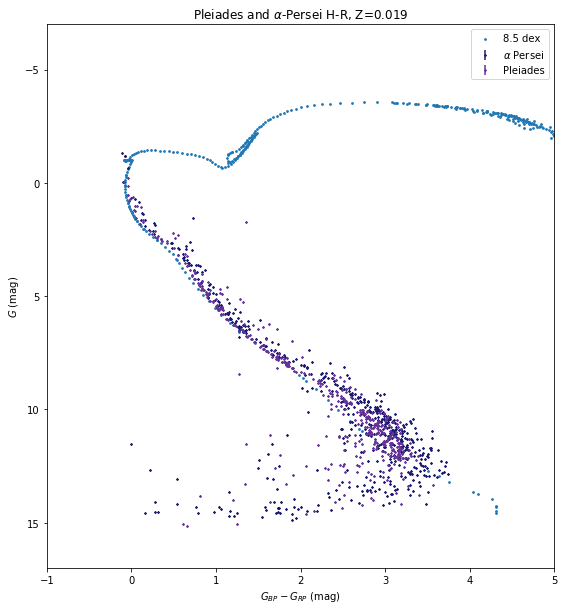

In [32]:
plt.figure(figsize=(20,10))
ax1 = plt.subplot(1,2,1)
#the error bars are there but you really have to zoom in to see them
plt.errorbar(x1, y1, yerr=yerr1, marker=(5, 1), color='midnightblue', linestyle='',
             markersize=2, label= r'$\alpha$ Persei')
plt.errorbar(x2, y2, yerr=yerr2, marker=(5, 1), color='rebeccapurple', linestyle='',
             markersize=2, label='Pleiades')

plt.scatter(x03[3], y03[3], s=3, label=lables[3])
plt.xlim((-1,5))
plt.ylim((-7,17))
plt.gca().invert_yaxis()
plt.legend()

plt.xlabel(r'$G_{BP}-G_{RP}$ (mag)')
plt.ylabel(r'$G$ (mag)')
plt.title(r'Pleiades and $\alpha$-Persei H-R, Z=0.019')

Text(0.5, 1.0, 'Pleiades H-R, Z=0.019')

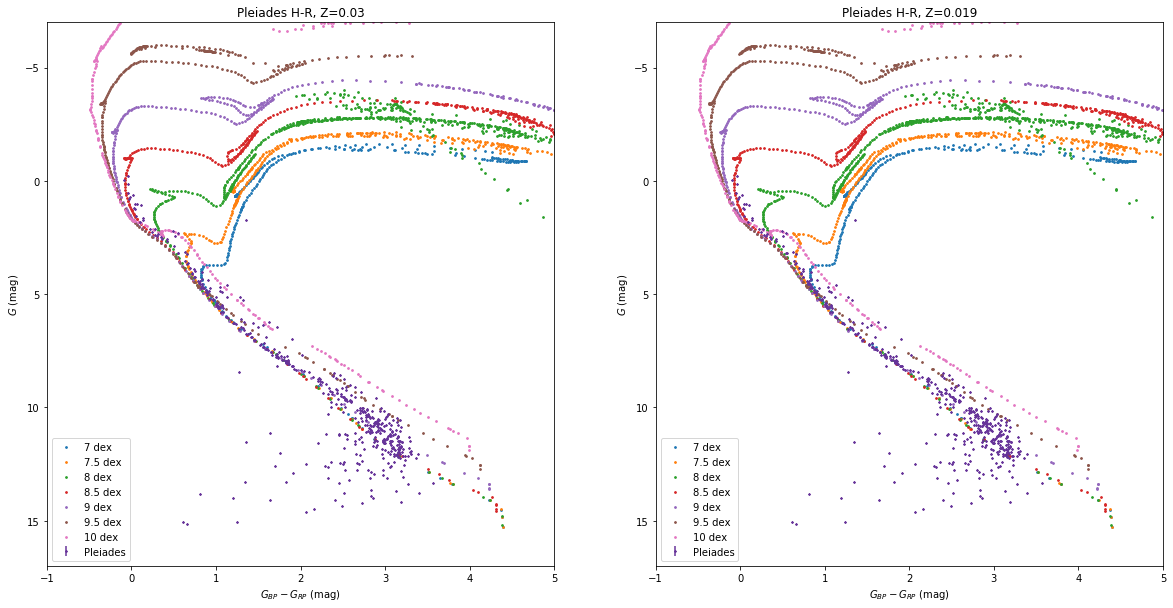

In [29]:
plt.figure(figsize=(20,10))
ax1 = plt.subplot(1,2,1)
#the error bars are there but you really have to zoom in to see them
plt.errorbar(x2, y2, yerr=yerr2, marker=(5, 1), color='rebeccapurple', linestyle='',
             markersize=2, label='Pleiades')
for ii in range(len(x03)):
    plt.scatter(x03[ii], y03[ii], s=3, label=lables[ii])
plt.xlim((-1,5))
plt.ylim((-7,17))
plt.gca().invert_yaxis()
plt.legend()

plt.xlabel(r'$G_{BP}-G_{RP}$ (mag)')
plt.ylabel(r'$G$ (mag)')
plt.title('Pleiades H-R, Z=0.03')
ax2 = plt.subplot(1,2,2)
plt.errorbar(x2, y2, yerr=yerr2, marker=(5, 1), color='rebeccapurple', linestyle='',
             markersize=2, label='Pleiades')
for ii in range(len(x19)):
    plt.scatter(x19[ii], y19[ii], s=3, label=lables[ii])
plt.xlim((-1,5))
plt.ylim((-7,17))
plt.gca().invert_yaxis()
plt.legend()
plt.xlabel(r'$G_{BP}-G_{RP}$ (mag)')
plt.ylabel(r'$G$ (mag)')
plt.title('Pleiades H-R, Z=0.019')

In [30]:
persei

source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_mag,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_mag,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,phot_variable_flag,teff_val,a_g_val,distance,distance error,ra hh,ra hhmmss,dec ddmmss,ra dec hour,G flux,G flux error,G mag,G_BP mag,G_RP mag
,deg,,deg,,mas,,,,,,,,,,,,,,,,,,,pc,pc,,,,h,,,,,
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str13,float64,float64,float64,float64,float64,str24,str25,float64,float64,float64,float64,float64,float64
249236647249997696,52.07799816050952,0.02735369764637676,48.66327520982392,0.02070214588591836,5.739072320659509,0.035206364980562475,178615.0444944814,176.43966067785394,12.558571,77804.19422945254,298.89680463554373,13.123879999999998,144082.7546744486,349.10597370359017,11.86539,1.2584906,0.5653095,0.69318104,0.6445710380329537,0.8655973926909697,NOT_AVAILABLE,4949.115,0.204,174.2441886296154,1.068901759358081,3.471866544033968,3:28:18.71955852228475,48:39:47.79075536612019,3.471866544033968,178615.0444944814,176.43966067785394,12.558571,13.123879999999998,11.86539
249241663772002048,52.43759668597534,0.17075487973298425,48.815603834388504,0.10517801391418984,5.522497832266666,0.19249621961447894,929.0549211354836,1.90208909983367,18.268263,97.74328526465416,6.227580315246871,20.376171,1431.280850992394,7.155338379084193,16.872608,3.5035629999999998,2.1079082000000002,1.3956547,--,--,NOT_AVAILABLE,--,--,181.07748167092677,6.311769010628444,3.495839779065023,3:29:45.02320463408227,48:48:56.173803798615566,3.495839779065023,929.0549211354836,1.90208909983367,18.268263,20.376171,16.872608
249232730234227072,52.17350764066001,0.2722741852362097,48.59716313063736,0.20503931404389436,5.318718793501758,0.3423091578100151,417.6767197372977,1.1740083137728186,19.136264999999998,37.64514372043868,5.8480155486038745,21.412115,657.6377803451478,6.524190855310186,17.716953,3.6951617999999993,2.2758502999999997,1.4193115,--,--,NOT_AVAILABLE,--,--,188.01520419198854,12.100531857610106,3.4782338427106674,3:28:41.641833758402534,48:35:49.7872702945044,3.4782338427106674,417.6767197372977,1.1740083137728186,19.136264999999998,21.412115,17.716953
249245683861151488,52.37905423171989,0.019269651493407418,48.870867514648246,0.01542349593513753,6.408510207191081,0.025399734013115287,41219.43908214624,9.52684509380109,14.150610999999998,11745.516967836316,23.4793557986474,15.176707999999998,43758.38273870542,60.03782794998968,13.159266,2.0174417,1.0260973,0.99134445,--,--,NOT_AVAILABLE,4207.27,0.6837,156.04250717707927,0.6184648301862757,3.491936948781326,3:29:30.973015612773146,48:52:15.12305273368657,3.491936948781326,41219.43908214624,9.52684509380109,14.150610999999998,15.176707999999998,13.159266
249346525393154048,52.833151420937774,0.13967280197760648,49.121681405695035,0.10794170200879978,5.4364729396008835,0.1890766443804846,1072.7265305227018,1.8249391462478437,18.112143,231.16490754733985,11.907680003090944,19.441584,1374.0050795910092,10.556037083286032,16.916948,2.5246353,1.3294411,1.1951942,--,--,NOT_AVAILABLE,--,--,183.94278995039284,6.3973988040043315,3.522210094729185,3:31:19.95634102506503,49:7:18.05306050212777,3.522210094729185,1072.7265305227018,1.8249391462478437,18.112143,19.441584,16.916948
249343845333181952,52.855228040080696,0.1918491032442363,49.04740126719649,0.1324862945810391,6.191390525620693,0.27572613560210474,972.7828568828903,2.5848314939466177,18.218327,104.84899809365689,9.940936508792786,20.299978,1487.7943161833982,8.783091008694063,16.830563,3.4694157,2.0816517,1.387764,--,--,NOT_AVAILABLE,--,--,161.51460578393238,7.192858843552996,3.5236818693387133,3:31:25.2547296193677,49:2:50.64456190736905,3.5236818693387133,972.7828568828903,2.5848314939466177,18.218327,20.299978

In [31]:
pleiades

source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_mag,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_mag,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,phot_variable_flag,teff_val,a_g_val,distance,distance error,ra hh,ra hhmmss,dec ddmmss,ra dec hour,G flux,G flux error,G mag,G_BP mag,G_RP mag
,deg,,deg,,mas,,,,,,,,,,,,,,,,,,,pc,pc,,,,h,,,,,
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str13,float64,float64,float64,float64,float64,str24,str25,float64,float64,float64,float64,float64,float64
69807963184755840,56.25481621280633,0.09120013019335783,24.77791432889511,0.054274271311222366,7.417320599391199,0.09660676038900932,4471.616972366853,5.864164738321693,16.562204,715.4754078747145,10.261976627848265,18.214901,6226.626523016941,15.380104008619783,15.276288000000001,2.938613,1.6526966,1.2859163,--,--,NOT_AVAILABLE,4648.69,0.4335,134.81957353738738,1.7559551406668106,3.7503210808537557,3:45:1.155891073520543,24:46:40.49158402239992,3.7503210808537557,4471.616972366853,5.864164738321693,16.562204,18.214901,15.276288000000001
69824249700740736,56.10293821837722,0.18508727093497232,24.864663544100104,0.1085578649997712,7.013173551302468,0.17580425648579784,7905.173120076068,7.935595297492322,15.943586999999999,1209.1479545414113,14.355197316081927,17.64519,10956.661225783315,23.62891270905186,14.6627245,2.9824648,1.701602,1.2808628,--,--,NOT_AVAILABLE,4462.17,--,142.58879987566866,3.574375817448385,3.740195881225148,3:44:24.705172410532626,24:51:52.78875876037383,3.740195881225148,7905.173120076068,7.935595297492322,15.943586999999999,17.64519,14.6627245
69817201658236288,56.51401197526275,0.6374433061404041,24.92790210175593,0.4419348411334744,8.65996783866331,0.6989329047005991,919.9474148436772,7.318776939474376,18.278957000000002,412.7776158673977,7.472692109602439,18.812098000000002,1041.4677761601863,14.638461861381275,17.217806,1.5942916999999999,0.5331402,1.0611515,--,--,NOT_AVAILABLE,--,--,115.47386995311899,9.31972137159926,3.7676007983508497,3:46:3.362874063058774,24:55:40.44756632134621,3.7676007983508497,919.9474148436772,7.318776939474376,18.278957000000002,18.812098000000002,17.217806
69811364798863744,56.10348263799232,0.050044425453401584,24.76821918626869,0.026497236855411586,7.470613704718746,0.05306481310822338,30702.74356199109,65.209319946544,14.470423,7780.98168390203,80.38287526333761,15.623802,35117.84279833408,188.25705615712482,13.398101,2.2257013,1.1533794,1.0723219,--,--,NOT_AVAILABLE,3533.25,0.691,133.8578113560281,0.9508107397116273,3.7402321758661548,3:44:24.83583311815729,24:46:5.5890705672886565,3.7402321758661548,30702.74356199109,65.209319946544,14.470423,15.623802,13.398101
69806039039416832,56.27740405421808,0.15707511029982027,24.67841523756801,0.08753670276489757,7.554070400251452,0.1688967296343097,1628.0660337721474,3.7396434535704217,17.659185,243.9726157449448,15.428901079247424,19.383035999999997,2485.991750919101,22.04070706447129,16.27317,3.1098652,1.7238503,1.3860149,--,--,NOT_AVAILABLE,--,--,132.37896220383558,2.959778318701859,3.751826936947872,3:45:6.5769730123394154,24:40:42.29485524483905,3.751826936947872,1628.0660337721474,3.7396434535704217,17.659185,19.383035999999997,16.27317
69811639676769536,56.08380189550965,0.04980770585465752,24.795967541491933,0.026489921505264132,7.424900457522267,0.051266107993134906,1225777.41489081,1922.879479732504,10.467336999999999,638884.8722589965,3524.6083087428747,10.8378315,833249.9834306388,3532.6774700240626,9.959982,0.8778495999999999,0.37049484,0.50735474,3.8939714465888073,3.0986250586978388,NOT_AVAILABLE,5430.6875,0.1275,134.68194027933217,0.9299274696794119,3.73892012636731,3:44:20.11245492231688,24:47:45.48314937095941,3.73892012636731,1225777.41489081,1922.879479732504,10.467336